In [107]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [48]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")
user_profile.head()

,Unnamed: 0,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,OFFNET_OUTGOING_Scaled,...,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance
0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,0.048813,...,LOW,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,0.053424,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,0.003606,...,LOW,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO
3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,0.004808,...,LOW,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO
4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,0.039197,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO


In [49]:
user_profile.columns

Index(['Unnamed: 0', 'event_source.hash', 'ONNET_OUTGOING_Categorical',
       'ONNET_OUTGOING_Scaled', 'ONNET_OUTGOING_Outlier',
       'ONNET_INCOMING_Categorical', 'ONNET_INCOMING_Scaled',
       'ONNET_INCOMING_Outlier', 'OFFNET_OUTGOING_Categorical',
       'OFFNET_OUTGOING_Scaled', 'OFFNET_OUTGOING_Outlier',
       'OFFNET_INCOMING_Categorical', 'OFFNET_INCOMING_Scaled',
       'OFFNET_INCOMING_Outlier', 'IDD_INCOMING_Categorical',
       'IDD_INCOMING_Scaled', 'IDD_INCOMING_Outlier',
       'IDD_OUTGOING_Categorical', 'IDD_OUTGOING_Scaled',
       'IDD_OUTGOING_Outlier', 'Peo_TV_Package', 'PEO_TV_Categorical',
       'PEO_TV_Scaled', 'BB_Categorical', 'BB_Scaled', 'Location_Identifier',
       'ONNET_Overall_Categorical', 'OFFNET_Overall_Categorical',
       'IDD_Overall_Categorical', 'VOICE_Categorical', 'Play_Type',
       'Play_Usage', 'Voice_Packages', 'Other_Packages', 'Household_Types',
       'Having_Insurance'],
      dtype='object')

# Clustering Users with Scaled features

In [50]:
x=user_profile.iloc[:,[3,6,9,12,15,18,22,24]].values
x

array([[0.00932104, 0.01751374, 0.04881279, ..., 0.        , 0.        ,
        0.        ],
       [0.05133929, 0.05631868, 0.05342425, ..., 0.        , 0.        ,
        0.        ],
       [0.00240385, 0.00137363, 0.00360577, ..., 0.        , 0.625     ,
        0.61979167],
       ...,
       [0.00294349, 0.00549451, 0.00120192, ..., 0.        , 0.        ,
        0.01388889],
       [0.21310832, 0.20398352, 0.1962814 , ..., 0.2724359 , 0.        ,
        0.        ],
       [0.04312206, 0.11246566, 0.02163462, ..., 0.        , 0.75      ,
        0.        ]])

## Agglomerative Clustering and Dendrogram
- Hierarchical Clustering

In [51]:
result=shc.linkage(x, method="ward")

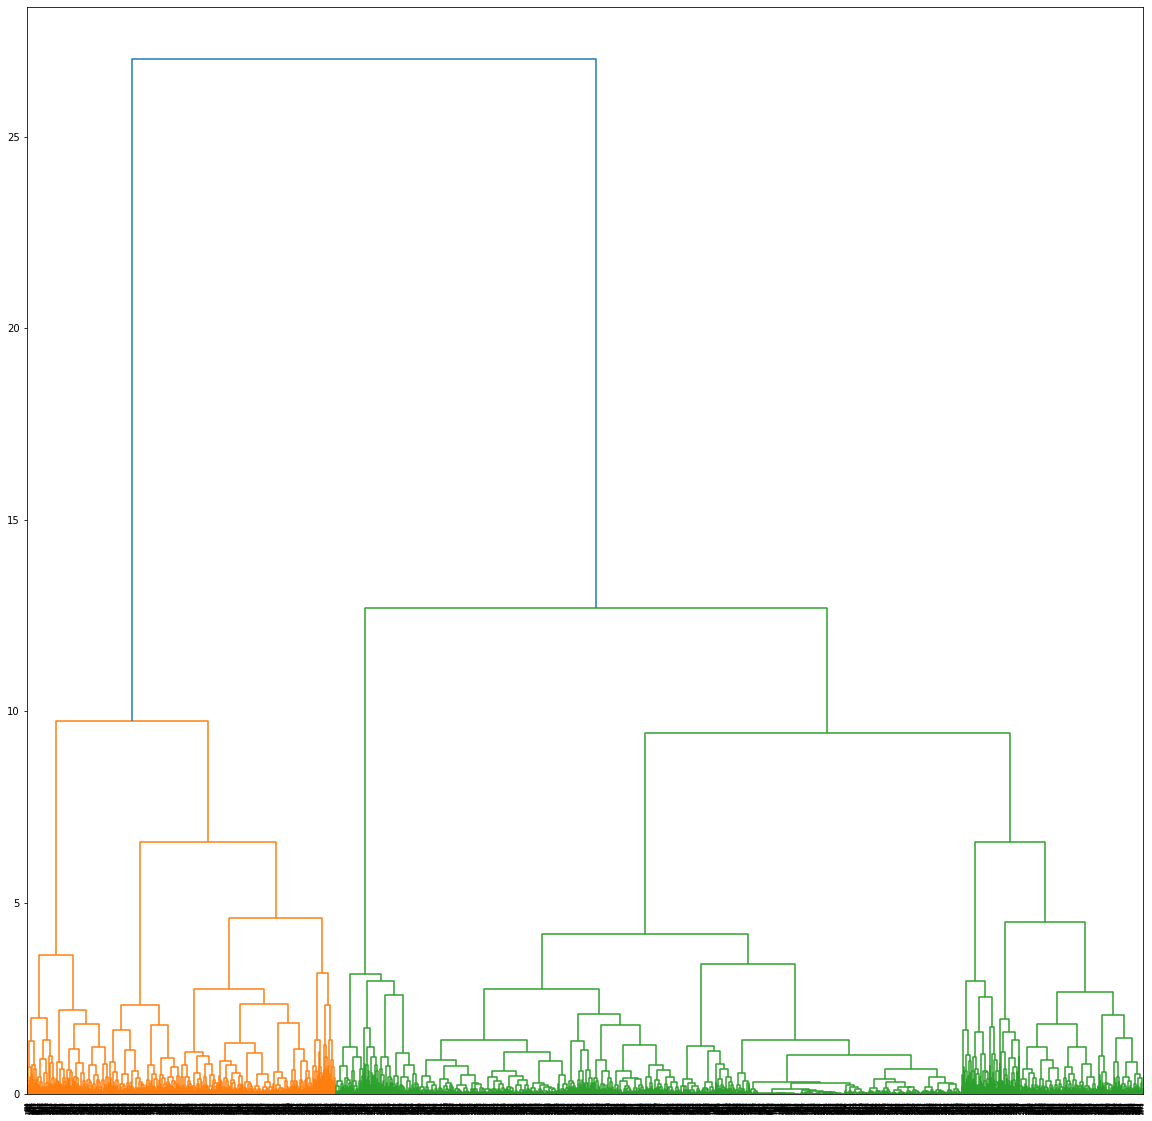

In [52]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

In [53]:
acl=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [54]:
acl.fit(x)

AgglomerativeClustering(n_clusters=3)

In [77]:
# cluster labels
acl.labels_

array([1, 1, 0, ..., 1, 1, 0])

### User counts in each cluster

In [56]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(acl.labels_)))

{0: 914, 1: 2145, 2: 248}

# K-Means Clustering

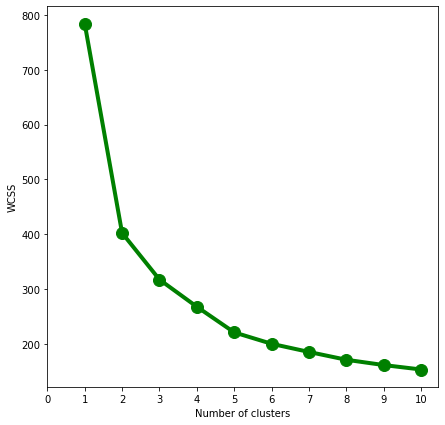

In [57]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [58]:
# since elbow occured at 1,2 and 10 (3), let's consider 3 clusters
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [81]:
y_clusters

array([1, 1, 2, ..., 1, 1, 2], dtype=int32)

In [59]:
model.labels_

array([1, 1, 2, ..., 1, 1, 2], dtype=int32)

In [80]:
cluster_labels=[2,1,0]
dict(zip(cluster_labels,np.bincount(model.labels_)))

{2: 308, 1: 2193, 0: 806}

In [60]:
model.cluster_centers_

array([[0.11566558, 0.10597271, 0.11584374, 0.10913438, 0.04312354,
        0.01854396, 0.06838474, 0.61245265],
       [0.09100333, 0.08974038, 0.10126058, 0.09854889, 0.03673621,
        0.01426231, 0.01759861, 0.02768753],
       [0.09977051, 0.09986166, 0.10600883, 0.11666854, 0.03582307,
        0.01589243, 0.79412221, 0.233186  ]])

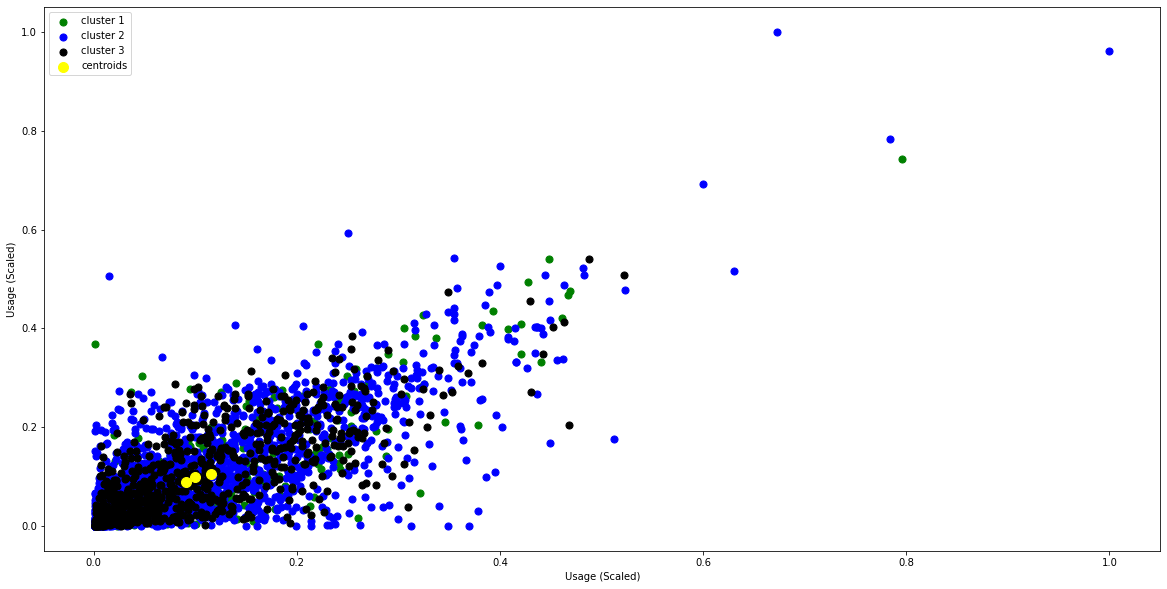

In [90]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "cluster 1")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 2")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Usage (Scaled)")
plt.ylabel("Usage (Scaled)")
plt.legend()
plt.show()

# Applying PCS for visualization purposes

In [115]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(x)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values
results_2d_df

,pca1,pca2
0,0.001838,0.234588
1,0.002499,0.238643
2,0.623219,0.519407
3,0.007906,0.251807
4,0.001903,0.236023
...,...,...
3302,0.001480,0.236335
3303,0.007277,0.265270
3304,0.003679,0.239653
3305,0.007434,0.264230


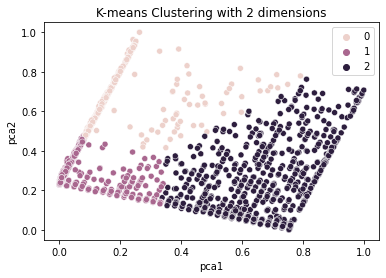

In [116]:
sns.scatterplot(x="pca1", y="pca2", hue=y_clusters, data=results_2d_df)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

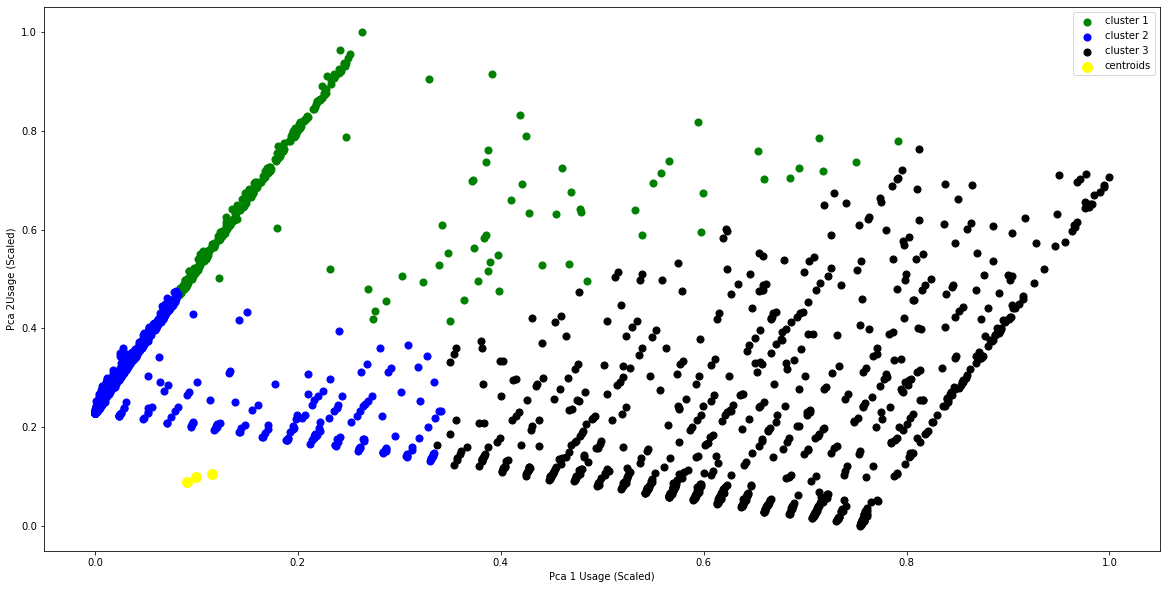

In [117]:
plt.figure(figsize = (20,10))
plt.scatter(results[y_clusters == 0,0],results[y_clusters == 0,1],s = 50, c = 'green', label = "cluster 1")
plt.scatter(results[y_clusters == 1,0],results[y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 2")
plt.scatter(results[y_clusters == 2,0],results[y_clusters == 2,1],s = 50, c = 'black', label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2Usage (Scaled)")
plt.legend()
plt.show()

### Using 3D visualization to visualize cluster densities more clearlity

In [123]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=3).fit_transform(x)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

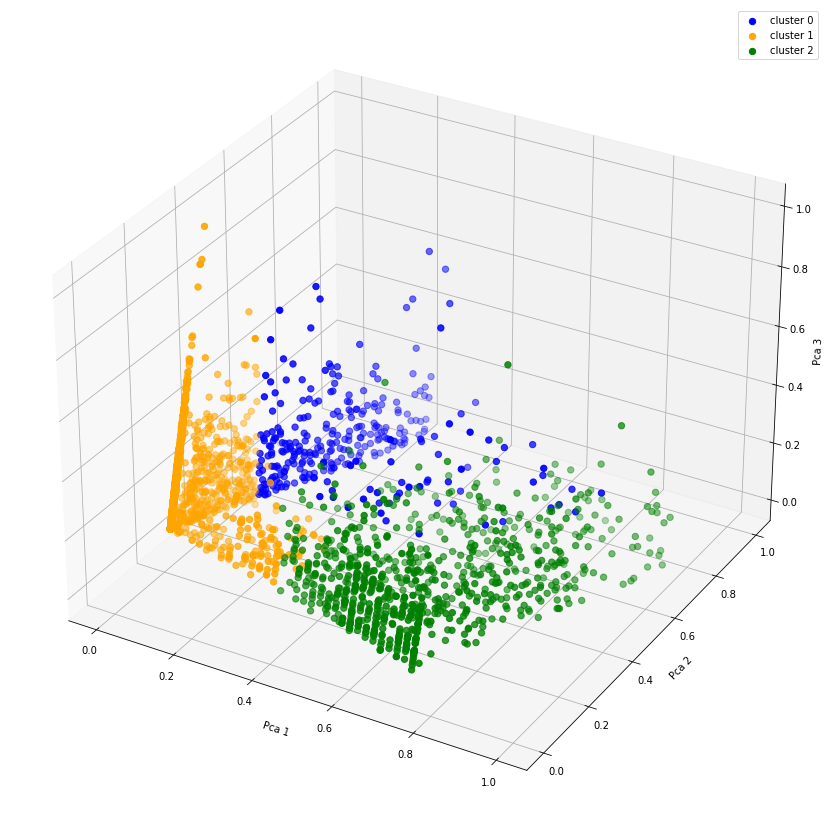

In [124]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[y_clusters == 0,0],results_3d[y_clusters == 0,1],results_3d[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[y_clusters == 1,0],results_3d[y_clusters == 1,1],results_3d[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[y_clusters == 2,0],results_3d[y_clusters == 2,1],results_3d[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [125]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()